In [2]:
import numpy as np
import sys
sys.path.append('../Codebase_AGWittmann/code-base/beamtime/')
import beamtime_utils as butils
import skimage
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
basefolder = 'C:\\Users\\jskolaut\\Seafile\\My Library\\Beamtime_2310_MAXIV_Hematite\\Analysis\\'
basefolder = '/home/julisko/Seafile/My Library/Beamtime_2310_MAXIV_Hematite/Analysis/energy_images_dricorr/'
basefolderfiles = sorted(os.listdir(basefolder))

filenames = []
fileformats = []
tiffilenames = []

for i in range(len(basefolderfiles)):
    file = basefolderfiles[i]
    filenames.append(os.path.splitext(file)[0])
    fileformats.append(os.path.splitext(file)[1])
    if fileformats[i] == '.tif' or fileformats[i] == '.tiff':
        tiffilenames.append(filenames[i]+fileformats[i])
print(tiffilenames)

['Dn10_709p5_avg_dricorr.tif', 'Dn10_710p8_avg_dricorr.tif', 'Dn20_709p5_avg_dricorr.tif', 'Dn20_710p8_avg_dricorr.tif', 'Dn30_709p5_avg_dricorr.tif', 'Dn30_710p8_avg_dricorr.tif', 'Dn40_709p5_avg_dricorr.tif', 'Dn40_710p8_avg_dricorr.tif', 'Dn50_709p5_avg_dricorr.tif', 'Dn50_710p8_avg_dricorr.tif', 'Dn60_709p5_avg_dricorr.tif', 'Dn60_710p8_avg_dricorr.tif', 'Dn70_709p5_avg_dricorr.tif', 'Dn70_710p8_avg_dricorr.tif', 'Dn80_709p5_avg_dricorr.tif', 'Dn80_710p8_avg_dricorr.tif', 'Dp00_709p5_avg_dricorr.tif', 'Dp00_710p8_avg_dricorr.tif', 'Dp10_709p5_avg_dricorr.tif', 'Dp10_710p8_avg_dricorr.tif', 'Dp20_709p5_avg_dricorr.tif', 'Dp20_710p8_avg_dricorr.tif', 'Dp30_709p5_avg_dricorr.tif', 'Dp30_710p8_avg_dricorr.tif', 'Dp40_709p5_avg_dricorr.tif', 'Dp40_710p8_avg_dricorr.tif', 'Dp50_709p5_avg_dricorr.tif', 'Dp50_710p8_avg_dricorr.tif', 'Dp60_709p5_avg_dricorr.tif', 'Dp60_710p8_avg_dricorr.tif', 'Dp70_709p5_avg_dricorr.tif', 'Dp70_710p8_avg_dricorr.tif', 'Dp80_709p5_avg_dricorr.tif', 'Dp80_710

In [ ]:
cut_edgepx_i = 100
cut_edgepx_j = 100

nrangles = int(len(tiffilenames)/2)
imageshape= np.shape(butils.read_tiff(basefolder+tiffilenames[0]))
print(imageshape)
imagepxnr_i = imageshape[0]-cut_edgepx_i
imagepxnr_j = imageshape[1]-cut_edgepx_j
xmld_stack = np.zeros((nrangles, imagepxnr_i, imagepxnr_j))
xmld_stack_corrected = np.zeros_like(xmld_stack)


for i in range(nrangles):
    lo_energy_im = butils.read_tiff(basefolder+tiffilenames[2*i])[cut_edgepx_i:cut_edgepx_i+imagepxnr_i,cut_edgepx_j:cut_edgepx_j+imagepxnr_j]
    hi_energy_im = butils.read_tiff(basefolder+tiffilenames[2*i+1])[cut_edgepx_i:cut_edgepx_i+imagepxnr_i,cut_edgepx_j:cut_edgepx_j+imagepxnr_j]
    xmld_stack[i] = butils.get_xmld(lo_energy_im,hi_energy_im)    
    #xmld_stack_corrected[i] = butils.readjust_contrast(xmld_stack_corrected[i])
    xmld_stack_corrected[i] = butils.remove_polynomial_background(xmld_stack[i],n=2,small_size=512)
    #xmld_stack_corrected[i] = butils.readjust_contrast(xmld_stack_corrected[i])
    

fig = plt.figure()
plt.imshow(lo_energy_im,cmap='gray')

fig = plt.figure()
plt.imshow(hi_energy_im,cmap='gray')

print(np.shape(xmld_stack))


fig = plt.figure(figsize=(12,12))
for i in range(nrangles):
    ax_temp = fig.add_subplot(int(np.ceil(np.sqrt(nrangles))),int(np.ceil(np.sqrt(nrangles))),i+1)
    ax_temp.imshow(xmld_stack_corrected[i],cmap='gray',vmax = 1)

fig = plt.figure(figsize=(12,12))
for i in range(nrangles):
    ax_temp = fig.add_subplot(int(np.ceil(np.sqrt(nrangles))),int(np.ceil(np.sqrt(nrangles))),i+1)
#    ax_temp.hist(xmld_stack_corrected[i].ravel(), bins = 100)

fig = plt.figure(figsize=(12,12))
for i in range(nrangles):
    ax_temp = fig.add_subplot(int(np.ceil(np.sqrt(nrangles))),int(np.ceil(np.sqrt(nrangles))),i+1)
    ax_temp.imshow(xmld_stack[i],cmap='gray',vmax = 5)

fig = plt.figure(figsize=(12,12))
for i in range(nrangles):
    ax_temp = fig.add_subplot(int(np.ceil(np.sqrt(nrangles))),int(np.ceil(np.sqrt(nrangles))),i+1)
    ax_temp.hist(xmld_stack[i].ravel(), bins = 100)

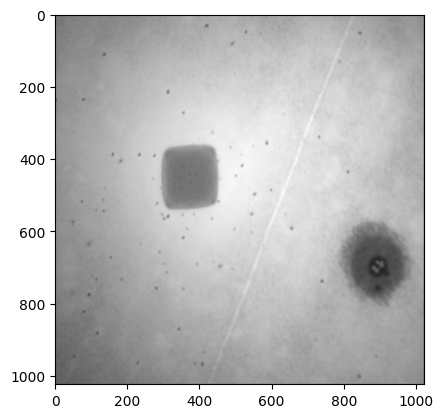

1.0 0.0 (1024, 1024)


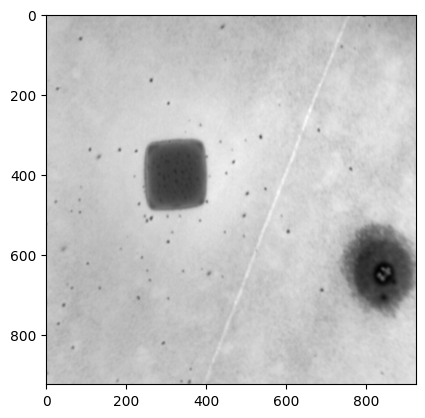

1.0 0.0


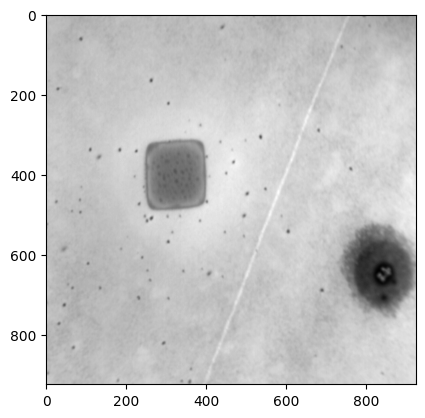

In [37]:
imagepath1= (basefolder+tiffilenames[1])
#image1 = cv2.cvtColor(basefolder+tiffilenames[0])
image1 = butils.read_tiff(imagepath1)#[256:-256,256:-256]
plt.imshow(image1, cmap = 'gray')#, vmin=-30,vmax= 35)
plt.show()
image1_bkgcorr = butils.slightly_smarter_background_correction(image1,n=2,edge_cutting_condition_factor=0.95)
image1_bkgcorr_norm = (image1_bkgcorr-np.min(image1_bkgcorr))/(np.max(image1_bkgcorr)-np.min(image1_bkgcorr))
print(np.max(image1_bkgcorr_norm),np.min(image1_bkgcorr_norm),np.shape(image1))
#plt.imshow(image1, vmin=80,vmax= 100)
plt.imshow(image1_bkgcorr_norm[50:-50,50:-50], cmap = 'gray')#, vmin=-30,vmax= 35)
plt.show()

imagepath2= (basefolder+tiffilenames[2])
#image1 = cv2.cvtColor(basefolder+tiffilenames[0])
image2 = butils.read_tiff(imagepath2)
image2_bkgcorr = butils.slightly_smarter_background_correction(image2,n=2,edge_cutting_condition_factor=0.95)
image2_bkgcorr_norm = (image2_bkgcorr-np.min(image2_bkgcorr))/(np.max(image2_bkgcorr)-np.min(image2_bkgcorr))
print(np.max(image2_bkgcorr_norm),np.min(image2_bkgcorr_norm))
#plt.imshow(image2, vmin=80,vmax= 100)
plt.imshow(image2_bkgcorr_norm[50:-50,50:-50], cmap = 'gray')#, vmin=-30,vmax= 35)
plt.show()
